In [14]:
import plotly.graph_objects as go
import pandas as pd

In [15]:
df = pd.read_csv('clustersdf.csv')
print(df.columns)
#df = df.drop('Cluster_11', axis=1)
df['Network'] = df['Program'].apply(lambda x: x.split()[0])
df = df.dropna()
clusts = ['Cluster_0','Cluster_1','Cluster_2','Cluster_3','Cluster_4','Cluster_5','Cluster_6','Cluster_7','Cluster_8','Cluster_9','Cluster_10']
for c in range(len(clusts)):
    df[clusts[c]] = df[clusts[c]].apply(lambda x: int(x) + c * 6) 
df.head()

Index(['Unnamed: 0', 'Program', 'Cluster_0', 'Cluster_1', 'Cluster_2',
       'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7',
       'Cluster_8', 'Cluster_9', 'Cluster_10'],
      dtype='object')


,Unnamed: 0,Program,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Network
0,0,CNN ANDERSON COOPER 360 DEGREES,2,7,14,20,26,31,38,42,49,55,62,CNN
3,3,CNN CNN LIVE EVENT/SPECIAL,2,7,12,20,26,31,38,42,48,55,62,CNN
4,4,CNN CNN NEWSROOM,0,8,14,20,26,31,38,44,50,56,62,CNN
5,5,CNN CNN RELIABLE SOURCES,0,8,14,19,26,31,38,44,50,55,60,CNN
7,7,CNN CNN Special Reports,2,6,12,20,26,30,36,42,49,55,62,CNN


In [16]:

clustdf = pd.DataFrame(columns=['source','target','type','value'])
for i in range(len(clusts) - 1):
    cdf = df.groupby([clusts[i],clusts[i + 1], 'Network']).agg({"Program": "count"})
    #print(cdf.head())
    for i in cdf.index:
        clustdf.loc[len(clustdf)] = [i[0],i[1],i[2],cdf.loc[i]['Program']]
clustdf.head()


,source,target,type,value
0,0,6,CNN,1
1,0,6,Fox,4
2,0,7,Fox,1
3,0,8,CNN,4
4,1,7,MSNBC,1


In [17]:

color_link = list(clustdf['type'])
color_link = list(map(lambda x: x.replace('CNN', 'tan').replace('MSNBC', 'blue').replace('Fox', 'red'), color_link))
print(color_link)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 30,
      thickness = 10,
      line = dict(color = "black", width = 0.5),
      label = [],#["January","January","January","February","February","February", "March","March","March","April","April","April",
               #"May","May","May",'June','June','June','July','July','July','August','August','August','September','September','September','October','October','October','November','November','November'],
      color = "black"
    ),
    link = dict(
      source = clustdf['source'],#[0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = clustdf['target'],#[2, 3, 3, 4, 4, 5],
      value = clustdf['value'], #[8, 4, 2, 8, 4, 2]
      color = color_link
  ))])

fig.update_layout(title_text="Topic-Stance Similarity Clusters 2020", font_size=10)
fig.show()

['tan', 'red', 'red', 'tan', 'blue', 'tan', 'red', 'tan', 'red', 'blue', 'tan', 'blue', 'tan', 'red', 'tan', 'red', 'tan', 'red', 'blue', 'tan', 'blue', 'tan', 'red', 'blue', 'tan', 'red', 'blue', 'tan', 'tan', 'red', 'tan', 'tan', 'red', 'blue', 'tan', 'red', 'blue', 'tan', 'red', 'tan', 'tan', 'tan', 'red', 'tan', 'red', 'blue', 'tan', 'red', 'red', 'tan', 'tan', 'tan', 'red', 'red', 'tan', 'red', 'blue', 'tan', 'blue', 'tan', 'red', 'blue', 'tan', 'blue', 'tan', 'tan', 'red', 'tan', 'red', 'blue', 'tan', 'tan', 'red', 'tan', 'red', 'tan', 'red', 'blue', 'tan', 'tan', 'red', 'red', 'tan', 'tan', 'red', 'blue', 'tan']


In [24]:
for i in range(len(df)):
    print(df[i:i+1])

   Unnamed: 0                          Program  Cluster_0  Cluster_1  \
0           0  CNN ANDERSON COOPER 360 DEGREES          1          8   

   Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cluster_6  Cluster_7  \
0         14         18         25         31         36         44   

   Cluster_8  Cluster_9  Cluster_10 Network  
0         50         54          61     CNN  
   Unnamed: 0                     Program  Cluster_0  Cluster_1  Cluster_2  \
3           3  CNN CNN LIVE EVENT/SPECIAL          1          7         14   

   Cluster_3  Cluster_4  Cluster_5  Cluster_6  Cluster_7  Cluster_8  \
3         18         25         31         36         42         48   

   Cluster_9  Cluster_10 Network  
3         54          60     CNN  
   Unnamed: 0           Program  Cluster_0  Cluster_1  Cluster_2  Cluster_3  \
4           4  CNN CNN NEWSROOM          0          8         14         18   

   Cluster_4  Cluster_5  Cluster_6  Cluster_7  Cluster_8  Cluster_9  \
4         25        

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit(df[clusts]).transform(df[clusts]), columns = ['pca1','pca2'])
pca_df['Network'] = list(df['Network'])
pca_df['Program'] = list(df['Program'])
#pca_df


41
17
16
8


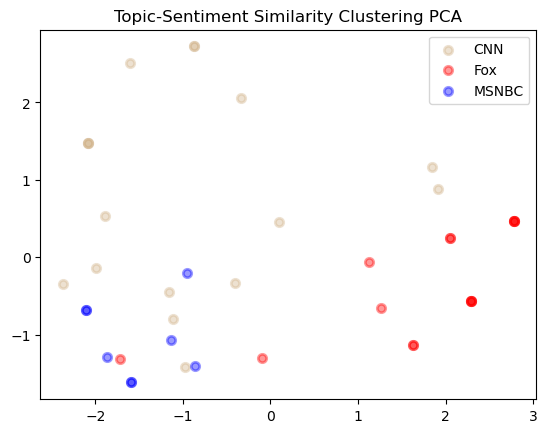

In [18]:
import matplotlib.pyplot as plt
import numpy as np
#weighted network of programs
plt.figure()
lw = 2
print(len(pca_df))
color = {'CNN': 'tan', 'MSNBC' : 'blue','Fox' : 'red'}
for c in pca_df['Network'].unique():

    plt.scatter(
        pca_df[pca_df["Network"] == c]["pca1"], pca_df[pca_df["Network"] == c]["pca2"],  alpha=0.4, lw=lw, label=c, color = color[c]
    )
    print(len(pca_df[pca_df["Network"] == c]))

    #plt.show()

"""for i in pca_df.index:
    if np.random.randint(10) < 2:
        plt.text(x=pca_df.pca1[i]+0.01,y=pca_df.pca2[i]+0.01,s=pca_df.Program[i], 
            fontdict=dict(color='red',size=10),
            bbox=dict(facecolor='yellow',alpha=0.5))"""
 

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Topic-Stance Similarity Clustering PCA")



plt.show()

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) 
kmeans.fit(pca_df[['pca1','pca2']])
cluster = kmeans.predict(pca_df[['pca1','pca2']])
pca_df['cluster'] = cluster
pca_df.head(45)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,pca1,pca2,Network,Program,cluster
0,-1.296210,1.590572,CNN,CNN ANDERSON COOPER 360 DEGREES,2
1,-0.677250,0.462551,CNN,CNN CNN LIVE EVENT/SPECIAL,3
2,-0.304720,2.798265,CNN,CNN CNN NEWSROOM,2
3,0.573984,1.496502,CNN,CNN CNN RELIABLE SOURCES,2
4,-0.196399,0.019250,CNN,CNN CNN Special Reports,3
5,-0.883337,1.879483,CNN,CNN CNN Tonight,2
6,-2.028757,-0.640910,CNN,CNN CUOMO PRIME TIME,0
7,-2.028757,-0.640910,CNN,CNN ERIN BURNETT OUTFRONT,0
8,1.807917,0.366425,CNN,CNN FAREED ZAKARIA GPS,1
9,-1.154310,-0.626855,CNN,CNN Inside Politics,0


41
11
5
17
8


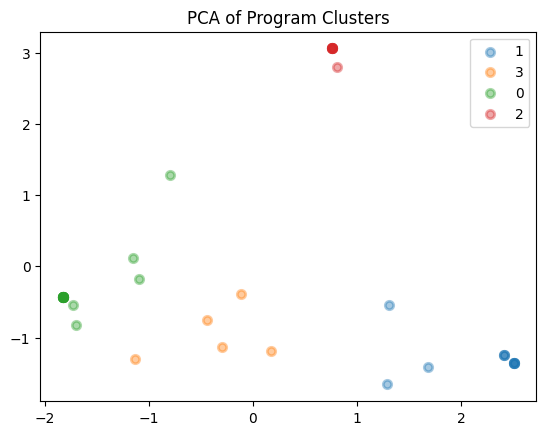

In [28]:
plt.figure()
lw = 2
print(len(pca_df))
for c in pca_df['cluster'].unique():
    plt.scatter(
        pca_df[pca_df["cluster"] == c]["pca1"], pca_df[pca_df["cluster"] == c]["pca2"],  alpha=0.4, lw=lw, label=c
    )
    print(len(pca_df[pca_df["cluster"] == c]))
    #plt.show()

"""for i in pca_df.index:
    if np.random.randint(10) < 2:
        plt.text(x=pca_df.pca1[i]+0.01,y=pca_df.pca2[i]+0.01,s=pca_df.Program[i], 
            fontdict=dict(color='red',size=10),
            bbox=dict(facecolor='yellow',alpha=0.5))"""
 

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Program Clusters")



plt.show()